In [2]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
np.random.seed(42)

In [3]:
cov = np.array([[1.2, 0.4], [0.4, 1.8]])
mean_x = np.array([0.5, 0.5]).T
mean_y = np.array([2.0, 2.0]).T
mean_z = np.array([1.3, 1.8]).T

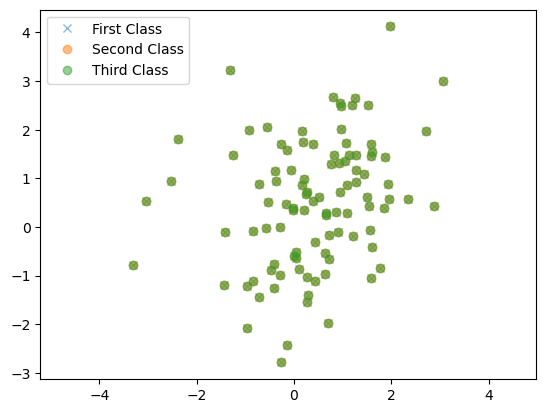

In [24]:
st_class_x, st_class_y = np.random.multivariate_normal(mean_x, cov, 100).T
nd_class_x, nd_class_y = np.random.multivariate_normal(mean_y, cov, 100).T
td_class_x, td_class_y = np.random.multivariate_normal(mean_z, cov, 100).T


plt.plot(st_class_x, st_class_y, 'x', label="First Class", alpha=0.5)
plt.plot(st_class_x, st_class_y, 'o', label="Second Class", alpha=0.5)
plt.plot(st_class_x, st_class_y, 'o', label="Third Class", alpha=0.5)
plt.legend()
plt.axis('equal')
plt.show()

## Question 3: Using the Python linear programming solver from cvxopt (check here), solve the following problem. The answer is the same presented in the class.

In [36]:
c = matrix([-5.0, -3.0])
A = matrix([[2.0, 2.0, -2.0, 0.0, 0.0], [2.0, -4.0, 1.0, -1.0, 1.0]])
b = matrix([33.0, 8.0, 5.0, -1.0, 8.0])
print(c)
print(A)
print(b)

[-5.00e+00]
[-3.00e+00]

[ 2.00e+00  2.00e+00]
[ 2.00e+00 -4.00e+00]
[-2.00e+00  1.00e+00]
[ 0.00e+00 -1.00e+00]
[ 0.00e+00  1.00e+00]

[ 3.30e+01]
[ 8.00e+00]
[ 5.00e+00]
[-1.00e+00]
[ 8.00e+00]



In [37]:
sol = solvers.lp(c, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0: -5.3100e+01 -1.5027e+02  8e+01  0e+00  7e-01  1e+00
 1: -7.0024e+01 -7.9172e+01  6e+00  4e-16  7e-02  2e-01
 2: -7.4102e+01 -7.4297e+01  1e-01  3e-16  1e-03  1e-02
 3: -7.4166e+01 -7.4168e+01  1e-03  6e-16  1e-05  1e-04
 4: -7.4167e+01 -7.4167e+01  1e-05  3e-16  1e-07  1e-06
 5: -7.4167e+01 -7.4167e+01  1e-07  4e-16  1e-09  1e-08
Optimal solution found.


In [40]:
x1 = sol['x'][0]
x2 = sol['x'][1]

if (x1 < x2):
    local_minimum = x1
    local_maximum = x2
else:
    local_minimum = x2
    local_maximum = x1


# Print the solution
print("Optimal solution:")
print(f"Local Minimum = {local_minimum:.2f}")
print(f"Local Maximum = {local_maximum:.2f}")

Optimal solution:
Local Minimum = 4.17
Local Maximum = 12.33
